# Comparison between sklearn's and gensim's implementations of NMF

In [1]:
from gensim.models.nmf import NMF as GensimNmf
from gensim.parsing.preprocessing import preprocess_documents
from sklearn.decomposition.nmf import NMF as SklearnNmf
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from matplotlib import pyplot as plt

# 20newsgroups

In [2]:
vectorizer = CountVectorizer()

In [3]:
bow_matrix = vectorizer.fit_transform(fetch_20newsgroups().data)
bow_matrix = bow_matrix.todense()[:100]

## Sklearn NMF

In [4]:
%%time

sklearn_nmf = SklearnNmf(n_components=5, tol=1e-5, max_iter=int(1e9))

W = sklearn_nmf.fit_transform(bow_matrix)
H = sklearn_nmf.components_

CPU times: user 1min 6s, sys: 2.62 s, total: 1min 8s
Wall time: 1min 26s


In [5]:
np.linalg.norm(bow_matrix - W.dot(H), 'fro')

184.4018340532723

## Gensim NMF

### Batch size = 1:

In [6]:
%%time

gensim_nmf = GensimNmf(n_components=5, lambda_=10000, kappa=1.)

n_samples = np.array(bow_matrix).shape[0]

gensim_nmf.fit(np.array(bow_matrix))
W, H = gensim_nmf.get_factor_matrices()
H = gensim_nmf.transform(np.array(bow_matrix))

Loss (no outliers): 0.038950696557992305	Loss (with outliers): 0.038950696557992305
Loss (no outliers): 12.374291063883145	Loss (with outliers): 12.374291063883145
Loss (no outliers): 5.156770519329132	Loss (with outliers): 5.156770519329132
Loss (no outliers): 11.101843628855159	Loss (with outliers): 11.101843628855159
Loss (no outliers): 8.05571876763995	Loss (with outliers): 8.05571876763995
Loss (no outliers): 20.937706770574415	Loss (with outliers): 20.937706770574415
Loss (no outliers): 9.203281161099605	Loss (with outliers): 9.203281161099605
Loss (no outliers): 34.42102791639135	Loss (with outliers): 34.42102791639135
Loss (no outliers): 7.452668767959762	Loss (with outliers): 7.452668767959762
Loss (no outliers): 17.234370934787727	Loss (with outliers): 17.234370934787727
Loss (no outliers): 9.469031763907571	Loss (with outliers): 9.469031763907571
Loss (no outliers): 35.79605592661074	Loss (with outliers): 35.79605592661074
Loss (no outliers): 9.930695094547113	Loss (with out

In [8]:
np.linalg.norm(bow_matrix.T - W.dot(H), 'fro')

439.7319206635389

### Batch size = 10

In [10]:
%%time

gensim_nmf = GensimNmf(n_components=5, lambda_=10000, kappa=1.)

n_samples = np.array(bow_matrix).shape[0]

gensim_nmf.fit(np.array(bow_matrix), batch_size=10)
W, H = gensim_nmf.get_factor_matrices()
H = gensim_nmf.transform(np.array(bow_matrix))

Loss (no outliers): 50.345374071810774	Loss (with outliers): 50.345374071810774
Loss (no outliers): 77.12037088692298	Loss (with outliers): 77.12037088692298
Loss (no outliers): 49.35898441808472	Loss (with outliers): 49.35898441808472
Loss (no outliers): 57.737151111560266	Loss (with outliers): 57.737151111560266
Loss (no outliers): 39.81658588550212	Loss (with outliers): 39.81658588550212
Loss (no outliers): 56.47023038205962	Loss (with outliers): 56.47023038205962
Loss (no outliers): 47.951189976276545	Loss (with outliers): 47.951189976276545
Loss (no outliers): 52.93036062308141	Loss (with outliers): 52.93036062308141
Loss (no outliers): 60.82805880767195	Loss (with outliers): 60.82805880767195
Loss (no outliers): 47.751924123962816	Loss (with outliers): 47.751924123962816
CPU times: user 1min 33s, sys: 14.7 s, total: 1min 48s
Wall time: 1min 58s


In [11]:
np.linalg.norm(bow_matrix.T - W.dot(H), 'fro')

235.55946506838575

From the personal experience I can say that the higher number of passes and shuffle of the trainset significantly improves performance.

Then, of course, you should perform hyperparameter tuning.

# Image of stars
### (For the sake of visualization of performance on sparse trainset)

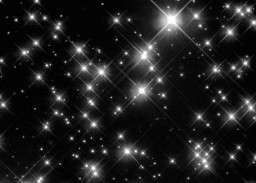

In [16]:
from PIL import Image
img = Image.open('stars_scaled.jpg').convert('L')
img

In [17]:
img_matrix = np.uint8(img.getdata()).reshape(img.size[::-1])
img_matrix.shape

(183, 256)

## Sklearn NMF

In [18]:
%%time

sklearn_nmf = SklearnNmf(n_components=10, tol=1e-5, max_iter=int(1e9))

W = sklearn_nmf.fit_transform(img_matrix)
H = sklearn_nmf.components_

CPU times: user 572 ms, sys: 153 ms, total: 725 ms
Wall time: 882 ms


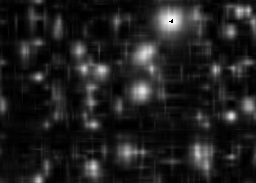

In [19]:
Image.fromarray(np.uint8(W.dot(H)), 'L')

## Gensim NMF

In [38]:
%%time

import itertools

passes = 10

gensim_nmf = GensimNmf(n_components=10, lambda_=1000., kappa=1.)

np.random.seed(42)

trainset = itertools.chain.from_iterable(
    img_matrix[np.random.choice(img_matrix.shape[0], img_matrix.shape[0], replace=False)] for _ in range(passes)
)

gensim_nmf.fit(trainset, batch_size=100)

Loss (no outliers): 6847.244327624558	Loss (with outliers): 6711.622125561542
Loss (no outliers): 4356.246832173107	Loss (with outliers): 4319.148378487362
Loss (no outliers): 3816.763966395636	Loss (with outliers): 3801.7012657135415
Loss (no outliers): 3783.0229750875146	Loss (with outliers): 3776.92928281768
Loss (no outliers): 3538.6024345874425	Loss (with outliers): 3534.493496826403
Loss (no outliers): 3493.1545028663386	Loss (with outliers): 3494.5782004996395
Loss (no outliers): 3527.266991690135	Loss (with outliers): 3530.389212896685
Loss (no outliers): 3532.976701348588	Loss (with outliers): 3540.374126706496
Loss (no outliers): 3338.930054172826	Loss (with outliers): 3340.5861231094664
Loss (no outliers): 3272.141047105983	Loss (with outliers): 3275.781551396264
Loss (no outliers): 3448.207329027923	Loss (with outliers): 3453.2536403398108
Loss (no outliers): 3267.5239311568457	Loss (with outliers): 3272.506192900864
Loss (no outliers): 3331.8821100413943	Loss (with outlier

In [39]:
W, _ = gensim_nmf.get_factor_matrices()
H, R = gensim_nmf.transform(img_matrix, return_r=True)

### Reconstructed matrix:

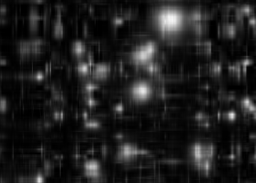

In [40]:
Image.fromarray(np.uint8(W.dot(H).T[-img_matrix.shape[0]:]), 'L')

### Residuals:

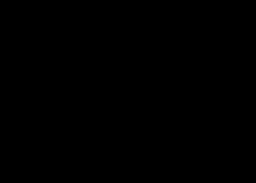

In [41]:
Image.fromarray(np.uint8(R.T), 'L')